# Random Forest
+ Ensamble en machine learning donde se combian árboles de decisión

## ¿Qué es un ensamble?
Proceso mediante el cual se construyen estratégicamente varios modelos de machine learning para resolver un problema particular.

+ Al  igual que el árbol de decisión, es un algoritmo de apredizaje supervisado.
+ Utilizado en problemas de clasificación.
+ También puede usarse para regresión.

Problemas de overfitting
Un de los problemas con la creación de un árbol de decisión es que si le damos la profundidad suficiente, tiende a "memorizar" las soluciones en vez de generalizar

![random forest](./img/random_forest.png)

## Ventajas
+ Funciona bien aún sin ajuste de hiperparámetros.
+ Al utilizar múltiples árboles se reduce considerablemente el riesgo de overfiting.
+ Suele mantenerse estable frente a nuevas muestras de datos. 

## Desventajas
+ En mucho más "costoso" de crear y ejecutar que "un solo arbol" de decisión.
+ No funciona bien con datasets pequeños.
+ Puede requerir muchisimo tiempo de entrenamiento.
+ Su interpretación a veces se vuelve compleja

## ¿Cuándo usar?
+ Rapido y fácil de aplicar.
+ En el caso de realizar técnicas de hypertuning de hiperparámetros.
+ Para problemas de clasificación y también de regresión.
+ Datasets grandes.
+ Para evitar el overfitting mediante la aplicación de método de ensamble.

In [1]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
# Cargar el dataset
df_diabetes = pd.read_csv('data/pima-indians-diabetes.csv', sep=',')

## EDA

In [3]:
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
72,4,129,86,20,270,35.1,0.231,23,0
146,2,106,64,35,119,30.5,1.400,34,0
86,2,100,68,25,71,38.5,0.324,26,0
407,8,197,74,0,0,25.9,1.191,39,1
119,0,162,76,56,100,53.2,0.759,25,1
757,1,106,76,0,0,37.5,0.197,26,0
190,9,123,70,44,94,33.1,0.374,40,0
544,8,186,90,35,225,34.5,0.423,37,1
671,10,68,106,23,49,35.5,0.285,47,0
453,2,100,54,28,105,37.8,0.498,24,0


In [4]:
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [5]:
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [6]:
df_diabetes.shape

(767, 9)

In [7]:
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [8]:
# Separando x - y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

## Procesamiento de datos

In [9]:
# Importar las librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# 30% para el test y 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

## Entrenamiento

In [14]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
# Calculo de las predicciones en train y test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación

In [16]:
# Calculo de las metricas
from sklearn.metrics import accuracy_score

# Calculo el accuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy in train is: ',  train_accuracy)
print('El accuracy in test is: ', test_accuracy)

El accuracy in train is:  0.9944029850746269
El accuracy in test is:  0.7316017316017316


In [18]:
# Verificar el feature importances
feature_inportanced_df = pd.DataFrame(
    {
        'features': list(X.columns),
        'Importance': random_forest.feature_importances_
    }
).sort_values('Importance', ascending=False)

# Mostrar
feature_inportanced_df

,features,Importance
1,2. Plasma glucose concentration a 2 hours in a...,0.251010
5,6. Body mass index (weight in kg/(height in m)^2),0.143227
7,8. Age (years),0.141232
6,7. Diabetes pedigree function,0.132584
0,1. Number of times pregnant,0.104101
4,5. 2-Hour serum insulin (mu U/ml),0.083910
2,3. Diastolic blood pressure (mm Hg),0.076752
3,4. Triceps skin fold thickness (mm),0.067183


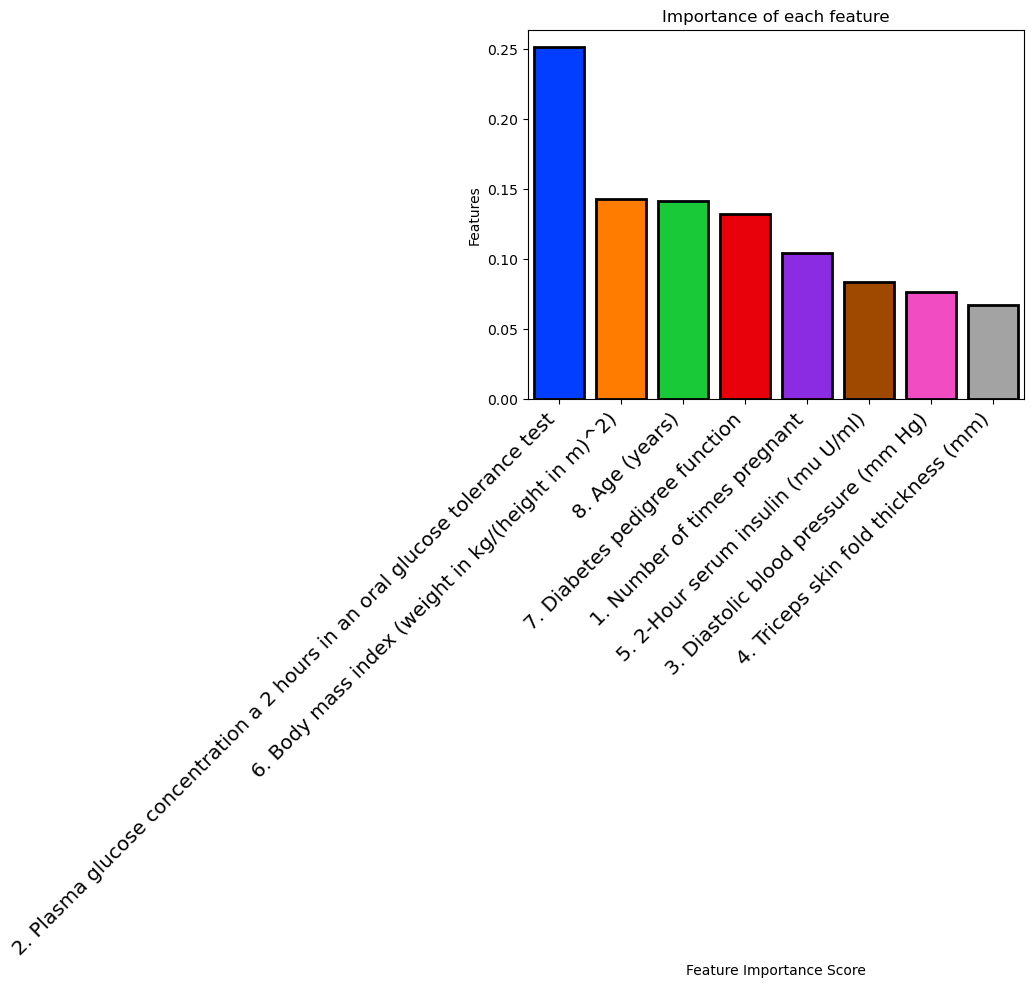

In [20]:
# Verificar el feature importances
import seaborn as sns

sns.barplot(x=feature_inportanced_df['features'], y=feature_inportanced_df['Importance'], palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importance of each feature')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
plt.show()